In [ ]:
## Step 1: Problem Statement 

Predict the Iris Category based Sepal and Petal lwngth and width features 

In [ ]:
## Step 2:  Data Gathering 

In [5]:
### Import Libraries 

import numpy as np 
import pandas as pd 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
iris = load_iris()
print(iris.DESCR)
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Species'] = iris.target
df

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

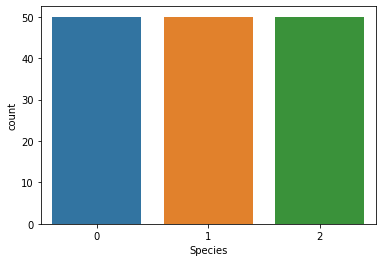

In [8]:
sns.countplot(df['Species'])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

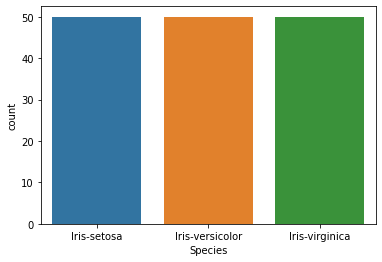

In [9]:
df1 = pd.read_csv('Iris.csv')
sns.countplot(df1['Species'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
## Step 6: Model Training 
x = df.drop('Species', axis = 1)
y = df['Species']

In [12]:
### Split the data 
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=10, test_size=0.3, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [13]:
### Model Training 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
model = LogisticRegression( multi_class='ovr')
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [15]:
### Step 6: Model Evaluation 

y_pred = model.predict(x_test)
y_pred

array([0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 0,
       1])

In [16]:
# y_test

In [17]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
cm = confusion_matrix(y_test,y_pred)

In [19]:
cm_df = pd.DataFrame(cm, index =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] )
cm_df

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,15,0,0
Iris-versicolor,0,14,1
Iris-virginica,0,0,15


<AxesSubplot:>

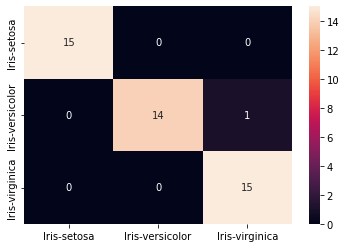

In [20]:
sns.heatmap(cm_df, annot= True)

In [21]:
from sklearn.metrics import multilabel_confusion_matrix

In [22]:
multilabel_confusion_matrix(y_test,y_pred)

array([[[30,  0],
        [ 0, 15]],

       [[30,  0],
        [ 1, 14]],

       [[29,  1],
        [ 0, 15]]], dtype=int64)

In [23]:
y_pred_train = model.predict(x_train)
y_pred_train

array([0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2])

In [24]:
confusion_matrix(y_train,y_pred_train)

array([[35,  0,  0],
       [ 0, 31,  4],
       [ 0,  2, 33]], dtype=int64)

In [25]:
multilabel_confusion_matrix(y_train,y_pred_train)

array([[[70,  0],
        [ 0, 35]],

       [[68,  2],
        [ 4, 31]],

       [[66,  4],
        [ 2, 33]]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [27]:
y_test.shape

(45,)

In [28]:
np.around(model.predict_proba(x_test),2)

array([[0.79, 0.21, 0.  ],
       [0.  , 0.29, 0.71],
       [0.97, 0.03, 0.  ],
       [0.  , 0.15, 0.85],
       [0.02, 0.71, 0.28],
       [0.79, 0.21, 0.  ],
       [0.38, 0.62, 0.01],
       [0.02, 0.78, 0.2 ],
       [0.94, 0.06, 0.  ],
       [0.25, 0.74, 0.01],
       [0.  , 0.27, 0.73],
       [0.  , 0.22, 0.78],
       [0.  , 0.29, 0.71],
       [0.9 , 0.1 , 0.  ],
       [0.  , 0.21, 0.79],
       [0.01, 0.44, 0.55],
       [0.84, 0.16, 0.  ],
       [0.76, 0.24, 0.  ],
       [0.  , 0.36, 0.64],
       [0.01, 0.66, 0.33],
       [0.9 , 0.1 , 0.  ],
       [0.88, 0.12, 0.  ],
       [0.  , 0.16, 0.84],
       [0.81, 0.19, 0.  ],
       [0.  , 0.29, 0.71],
       [0.03, 0.81, 0.16],
       [0.  , 0.15, 0.85],
       [0.04, 0.8 , 0.17],
       [0.85, 0.15, 0.  ],
       [0.  , 0.36, 0.64],
       [0.  , 0.43, 0.57],
       [0.07, 0.86, 0.07],
       [0.05, 0.87, 0.08],
       [0.  , 0.29, 0.71],
       [0.01, 0.61, 0.38],
       [0.88, 0.12, 0.  ],
       [0.  , 0.32, 0.68],
 

In [ ]:
[[0.79, 0.21, 0.  ], >> class 0
[0.  , 0.29, 0.71],  >> class 2 
[0.97, 0.03, 0.  ],  >> class 0 
[0.  , 0.15, 0.85],  >> class 2 
[0.02, 0.71, 0.28],  >> class 1

In [31]:
y_pred[:5]

array([0, 2, 0, 2, 1])

In [32]:
0.02 + 0.71 + 0.28

1.01

In [33]:
y_pred

array([0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 0,
       1])

### USER Input function 

In [34]:

user_input = [4.6,3.1,1.5,0.2]

result = model.predict([user_input])
result

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [35]:


sl = eval(input(f"Enter Sepal Length = "))
sw = eval(input(f"Enter Sepal Width = "))
pl = eval(input(f"Enter Petal Length = "))
pw = eval(input(f"Enter Petal Width = "))

arr = np.array([[sl,sw,pl,pw]])
result = model.predict(arr)
result

if result[0] == 0:
    print("Iris - Setosa")
if result[0] == 1:
    print("Iris - Versicolor")
if result[0] == 2:
    print("Iris - Virginica")

Enter Sepal Length = 6.7
Enter Sepal Width = 3.0
Enter Petal Length = 5.2
Enter Petal Width = 2.3
Iris - Virginica


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
df.tail(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [58]:
def predict(arr):

    result = model.predict(arr)
    result

    if result[0] == 0:
        result = "Iris - Setosa"
        print("Iris - Setosa")
    if result[0] == 1:
        result = "Iris - Veriscolor"
        print("Iris - Versicolor")
    if result[0] == 2:
        result = "Iris - Virgininca"
        print("Iris - Virginica")
    return result
    
    
if __name__ == "__main__": 
    sl = eval(input(f"Enter Sepal Length = "))
    sw = eval(input(f"Enter Sepal Width = "))
    pl = eval(input(f"Enter Petal Length = "))
    pw = eval(input(f"Enter Petal Width = "))
    arr = np.array([[sl,sw,pl,pw]])
    
    res = predict(arr)
    print(res)
    
    

Enter Sepal Length = 5.5
Enter Sepal Width = 3.4
Enter Petal Length = 7.2
Enter Petal Width = 5.2
Iris - Virginica


C:\Users\Shridhar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
#save model
import pickle 
iris_dataset='savemodel.sav'
pickle.dump(model,open (iris_dataset,'wb'))

In [39]:
load_model=pickle.load(open(iris_dataset,'rb'))